# Plotting graphs in Python: An introduction

This is an introduction to plotting simple graphs of data in Python.  Very much the sort of thing you might want to do in a simple physics experiment.

#Introduction

```matplotlib``` is an excellent library for generating scientific figures. Some of the many advantages of this library include:

* Easy to get started
* Support for $\LaTeX$ formatted labels and texts
* Great control of every element in a figure, including figure size and DPI. 
* High-quality output in many formats, including PNG, PDF, SVG, EPS, and PGF.

One of the key features of matplotlib that I would like to emphasize, and that I think makes matplotlib highly suitable for generating figures for scientific publications is that all aspects of the figure can be controlled *programmatically*. This is important for reproducibility and convenient when one needs to regenerate the figure with updated data or change its appearance. 

More information at the [Matplotlib web page](http://matplotlib.org/).

To get started using matplotlib in a Python program, import the `matplotlib.pyplot` module under the name `plt`:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Getting your data

Now we need some data to plot.  matplotlib expects to plot numpy arrays, so we need to shovel our data into these.

We'll start with some simple data of the angles of incidence and refraction for light entering glass:

| $\theta_\mathrm{i}~/~^\circ$ | $\theta_\mathrm{r}~/~^\circ$ |
| -- | -- |
| 14.0 | 9.0 |
| 35.0 | 21.5 |
| 49.0 | 29.0 |
| 59.0 | 33.0 |
| 69.5 | 37.5 |
| 88.0 | 39.5 |

Now let's put these into numpy arrays:

In [2]:
incidence = np.array ([14.0, 35.0, 49.0, 59.0, 69.5, 88.0])
refraction = np.array ([9.0, 21.5, 29.0, 33.0, 37.5, 39.5])
print(incidence)
print(refraction)

[ 14.   35.   49.   59.   69.5  88. ]
[  9.   21.5  29.   33.   37.5  39.5]


## Plotting

We create our graph in the matplotlib `figure` environment.  The figure we produce is put into the variable `fig`, and within that we create our axes (we'll put these into the variable `ax`, so that we can operate on the axes object we have created later).

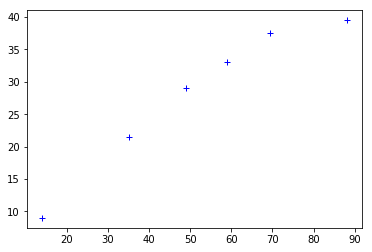

In [3]:
fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(incidence, refraction, 'b+')

plt.show()

### Labelling axes

Of course, we *always* want axis labels.  Matplotlib has great support for $\LaTeX$. All we need to do is to use dollar signs encapsulate $\LaTeX$ in any text (legend, title, label, etc.). For example, ```$y=x^3$``` would produce $y=x^3$.

But here we can run into a slightly subtle problem with $\LaTeX$ code and Python text strings. In $\LaTeX$, we frequently use the backslash in commands, for example ```\alpha``` to produce the symbol $\alpha$. But the backslash already has a meaning in Python strings (the escape code character). To avoid Python messing up our latex code, we need to use "raw" text strings. Raw text strings are prepended with an ```r```, like ```r"\alpha"``` or ```r'\alpha'``` instead of ```"\alpha"``` or ```'\alpha'```:

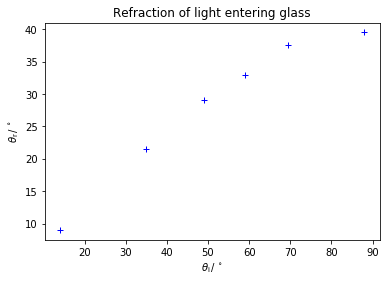

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xlabel(r'$\theta_\mathrm{i}\,/\,^\circ$')
ax.set_ylabel(r'$\theta_\mathrm{r}\,/\,^\circ$')
ax.set_title('Refraction of light entering glass')

ax.plot(incidence, refraction, 'b+')

plt.show()

### Axis ranges

In this particular example of refraction, it's a good idea to show the origin on the graph, so we need to adjust the ranges of the axes.

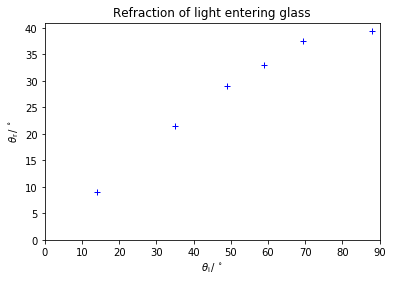

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(incidence, refraction, 'b+')

ax.set_ylim(bottom=0) # note this has to come after plotting of data
ax.set_xlim(0,90)

ax.set_xlabel(r'$\theta_\mathrm{i}\,/\,^\circ$')
ax.set_ylabel(r'$\theta_\mathrm{r}\,/\,^\circ$')
ax.set_title('Refraction of light entering glass')

plt.show()

## Data manipulation

Python is of course very good when it comes to processing your data.  In this particular case, a sensible thing would be to use our experimental data to test Snell's law,
$$n=\frac{\sin\theta_\mathrm{i}}{\sin\theta_\mathrm{r}}.$$

A graph of $\sin\theta_\mathrm{r}$ on the $y$-axis against $\sin\theta_\mathrm{i}$ on the $x$-axis should be a straight line going through the origin, with gradient of $\frac{1}{n}$.

Note that the ```sin()``` function in the numpy package expects its argument to be in radians.  Fortunately, there is a function in numpy which will do the conversion: ```deg2rad()```.

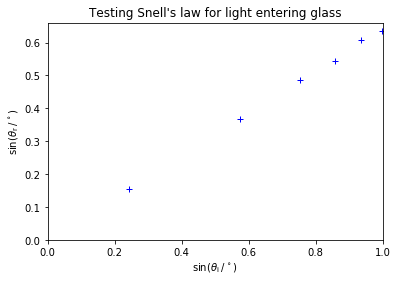

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(np.sin(np.deg2rad(incidence)), np.sin(np.deg2rad(refraction)), 'b+')

ax.set_ylim(bottom=0) # note this has to come after plotting of data
ax.set_xlim(0,1)

ax.set_xlabel(r'$\sin(\theta_\mathrm{i}\,/\,^\circ)$')
ax.set_ylabel(r'$\sin(\theta_\mathrm{r}\,/\,^\circ)$')
ax.set_title("Testing Snell's law for light entering glass")

plt.show()

## A linear fit

Now it would be good to show the trend on our graph with a line of best fit.  In this case (and this is the most common type of fit you might want) the line is straight.

Python can do a fit which minimizes the distance of the line from the points (this is known as least squares regression).

Whilst there is a function ```polyfit(x,y,deg,...)``` in numpy, there is a specialized function for simple linear regression in the ```stats``` module of ```scipy```, a useful package for scientific work.  Here is how that function, ```lingress(x,y)```, might work for our data.

The value of 1/n is  0.639576074518  +/-  0.00860467617687
The value of n is  1.56 +/- 0.02


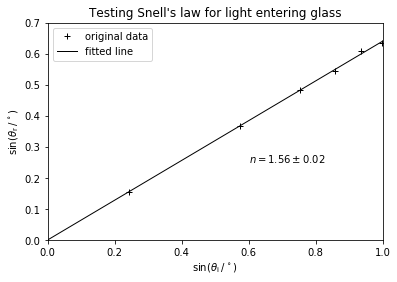

In [7]:
from scipy import stats

slope, intercept, r_value, p_value, std_err \
    = stats.linregress(np.sin(np.deg2rad(incidence)), np.sin(np.deg2rad(refraction)))

print("The value of 1/n is ", slope, " +/- ", std_err)
print("The value of n is ", np.round(1/slope,2), "+/-", np.round(std_err/slope**2,2))

fig = plt.figure()
ax = fig.add_subplot(111)


ax.set_ylim(0,0.7)
ax.set_xlim(0,1)

ax.set_xlabel(r'$\sin(\theta_\mathrm{i}\,/\,^\circ)$')
ax.set_ylabel(r'$\sin(\theta_\mathrm{r}\,/\,^\circ)$')
ax.set_title("Testing Snell's law for light entering glass")

x=np.linspace(0.0,1.0,10)

ax.plot(np.sin(np.deg2rad(incidence)), np.sin(np.deg2rad(refraction)), 'k+', label='original data')
ax.plot(x, intercept + slope*x, 'k-', linewidth=1, label='fitted line')
ax.legend(loc=2)
ax.text(0.6, 0.25, r'$n=1.56\pm 0.02$')

plt.show()

In [8]:
%load_ext version_information

%version_information numpy, matplotlib, scipy

Software versions
Python 3.6.1 32bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 5.3.0
OS Linux 3.2.98 smp i686 Intel R _Pentium R _4_CPU_2.40GHz with slackware 14.0
numpy 1.12.1
matplotlib 2.0.2
scipy 0.19.0
Sun Apr 15 23:46:03 2018 GMT